<a href="https://colab.research.google.com/github/Aman-pr/Indo-Machine-learning-/blob/main/Movie_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import spacy
from scipy import sparse

In [ ]:
train=pd.read_csv('/content/train_data.txt',sep=':::',header=None,names=['id','title','genre','description'])
test=pd.read_csv('/content/test_data_solution.txt',sep=':::',header=None,names=['id','title','genre','description'])

<ipython-input-2-90b150340339>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train=pd.read_csv('/content/train_data.txt',sep=':::',header=None,names=['id','title','genre','description'])
<ipython-input-2-90b150340339>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test=pd.read_csv('/content/test_data_solution.txt',sep=':::',header=None,names=['id','title','genre','description'])


In [ ]:
train=train.drop(['id'],axis=1)
test=test.drop(['id'],axis=1)

In [ ]:
def extract_year(data):
    if data.split('(')[-1][:4].isdigit():
        return int(data.split('(')[-1][:4])
    return None

train['year']=train['title'].apply(extract_year)
test['year']=test['title'].apply(extract_year)

In [ ]:
def transform_title(data):
    if data.split('(')[-1][:4].isdigit():
        return data.split('(')[:-1][0]
    return None

train['title']=train['title'].apply(transform_title)
test['title']=test['title'].apply(transform_title)

In [ ]:
missing_val=train.isna().sum()['year']
total_val=train.shape[0]
print(f'"Year" Column on train dataset got {(missing_val/total_val)*100} percent missing values.')

"Year" Column on train dataset got 4.965507064595861 percent missing values.


missing_val=test.isna().sum()['year']
total_val=test.shape[0]
print(f'"Year" Column on test dataset got {(missing_val/total_val)*100} percent missing values.')

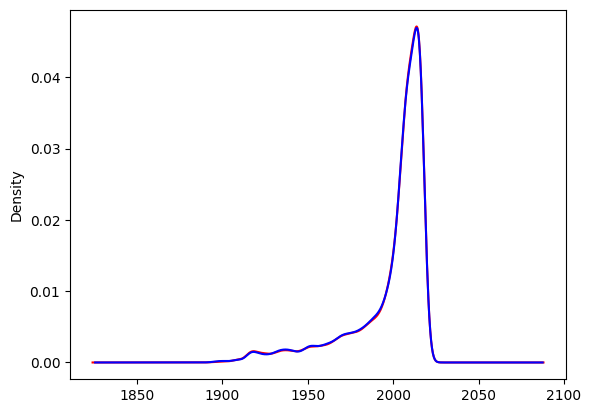

In [ ]:
train['year'].plot(kind='kde',color='red')
test['year'].plot(kind='kde',color='blue')
plt.show()

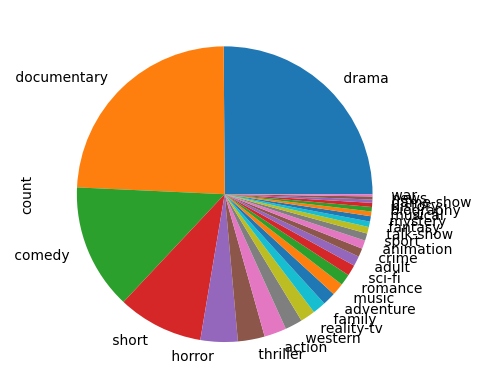

In [ ]:
train['genre'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
# making x_train & y_train and x_test & y_test

x_train=train.drop('genre',axis=1)
y_train=train['genre']

x_test=test.drop('genre',axis=1)
y_test=test['genre']

In [ ]:
# for imputing missing values
tran_imputing_na_101 = ColumnTransformer(
    [("fill_na", SimpleImputer(missing_values=np.nan, strategy='mean'), [-1])],remainder='passthrough')

# put bins on year column
tran_binning_102 = ColumnTransformer(
    [("binning_year", KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile'), [0])],remainder='passthrough')

pipeline_101 = Pipeline([('Imputing_values',tran_imputing_na_101),('Binning',tran_binning_102)])

x_train=pipeline_101.fit_transform(x_train)
x_test=pipeline_101.fit_transform(x_test)

In [ ]:
class merge(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,data,y=None):
        return self
    def transform(self,data,y=None):
        #data=np.array(data)
        for i in range(data.shape[0]):
            one_cell=''
            for individual in data[i]:
                one_cell += str(individual)
            data[i]=one_cell
        return data[:,:1].flatten()


# merging all the individual columns and making them one
pipeline_201 = Pipeline([('merging_columns_into_single',merge())])

In [ ]:
x_train=pipeline_201.fit_transform(x_train)
x_test=pipeline_201.fit_transform(x_test)

In [ ]:
class text_processing(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,data,y=None):
        return self
    def transform(self,data,y=None):
        for i in range(data.shape[0]):
            filter_token=''
            for token in nlp(data[i]):
                if not token.is_punct and not token.is_stop:
                    filter_token+=(token.lower_+' ')
            data[i]=filter_token
        return data


nlp=spacy.load('en_core_web_sm') # making a spacy object
# implementing text processing
pipeline_301 = Pipeline([('merging_columns_into_single',text_processing())])

In [ ]:
x_train=pipeline_301.fit_transform(x_train)
x_test=pipeline_301.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
pipeline_401 = Pipeline([('tf_idf_vector',TfidfVectorizer())])

In [ ]:
x_train=pipeline_401.fit_transform(x_train)
x_test=pipeline_401.transform(x_test)

In [ ]:
# converting numpy sparase metrics to Scipy metrics

x_train=sparse.csr_matrix(x_train)
x_test=sparse.csr_matrix(x_test)

In [ ]:
# Performing Label Encoding on Output Column

label_encoder=LabelEncoder()

y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.fit_transform(y_test)

Implementing different Models

In [ ]:
clf = BernoulliNB(alpha=2,fit_prior=False,binarize=0.019).fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.4537822878228782

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=230,weights='distance').fit(x_train,y_train)
y_pred=neigh.predict(x_test)
accuracy_score(y_test, y_pred)

0.46870848708487084

In [ ]:
rfc = RandomForestClassifier(n_estimators=195, random_state=42).fit(x_train,y_train)
y_pred=rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.4928228782287823

In [ ]:
clf = LogisticRegression(multi_class='multinomial',solver='saga').fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.5896863468634687